# Model for Diabetes Risk Prediction 

## PIMA Indian Diabetes Dataset 3

 ( Dataset removing missing value rows)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Drop columns that cannot be collected by IoT Devices

In [7]:
df.drop(columns=['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   BMI            768 non-null    float64
 3   Age            768 non-null    int64  
 4   Outcome        768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

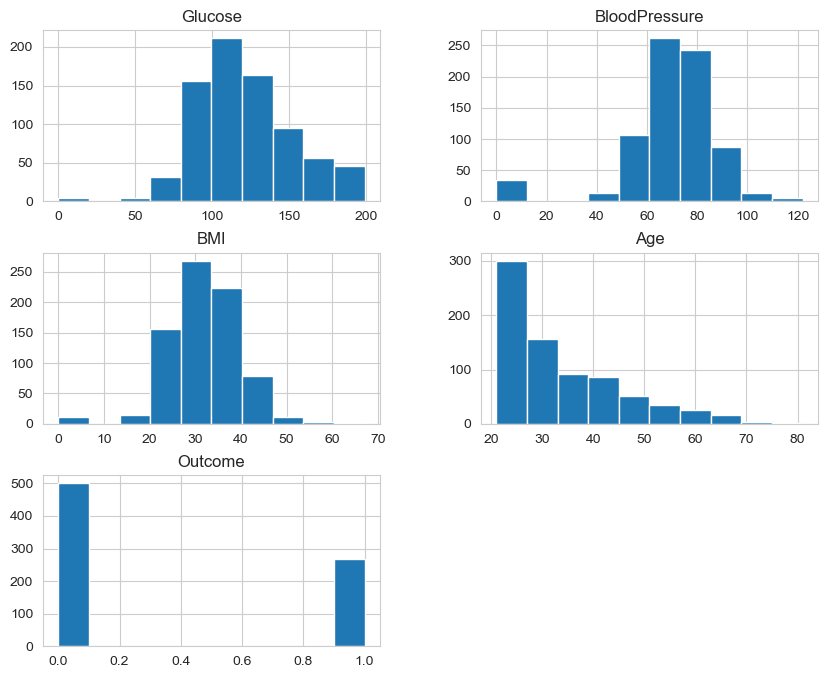

In [9]:
df.hist(bins=10, figsize=(10,8))

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Replace 'zero' with null

In [11]:
# Copy the first 4 columns
rows_to_impute = df.iloc[:, 0:3].copy()

# Replace zero values with NaN
rows_to_impute.replace(0, np.nan, inplace=True)

# Update df with the processed data
df.iloc[:, 0:3] = rows_to_impute
print(df)

     Glucose  BloodPressure   BMI  Age  Outcome
0      148.0           72.0  33.6   50        1
1       85.0           66.0  26.6   31        0
2      183.0           64.0  23.3   32        1
3       89.0           66.0  28.1   21        0
4      137.0           40.0  43.1   33        1
..       ...            ...   ...  ...      ...
763    101.0           76.0  32.9   63        0
764    122.0           70.0  36.8   27        0
765    121.0           72.0  26.2   30        0
766    126.0           60.0  30.1   47        1
767     93.0           70.0  30.4   23        0

[768 rows x 5 columns]


/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_91531/705721988.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:3] = rows_to_impute
/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_91531/705721988.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:3] = rows

Drop row that have null

In [12]:
df.isnull().sum()

Glucose           5
BloodPressure    35
BMI              11
Age               0
Outcome           0
dtype: int64

In [13]:
df = df.dropna()
print(df)

     Glucose  BloodPressure   BMI  Age  Outcome
0      148.0           72.0  33.6   50        1
1       85.0           66.0  26.6   31        0
2      183.0           64.0  23.3   32        1
3       89.0           66.0  28.1   21        0
4      137.0           40.0  43.1   33        1
..       ...            ...   ...  ...      ...
763    101.0           76.0  32.9   63        0
764    122.0           70.0  36.8   27        0
765    121.0           72.0  26.2   30        0
766    126.0           60.0  30.1   47        1
767     93.0           70.0  30.4   23        0

[724 rows x 5 columns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        724 non-null    float64
 1   BloodPressure  724 non-null    float64
 2   BMI            724 non-null    float64
 3   Age            724 non-null    int64  
 4   Outcome        724 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 33.9 KB


In [15]:
df.describe()

,Glucose,BloodPressure,BMI,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000
mean,121.882597,72.400552,32.467127,33.350829,0.343923
std,30.750030,12.379870,6.888941,11.765393,0.475344
min,44.000000,24.000000,18.200000,21.000000,0.000000
25%,99.750000,64.000000,27.500000,24.000000,0.000000
50%,117.000000,72.000000,32.400000,29.000000,0.000000
75%,142.000000,80.000000,36.600000,41.000000,1.000000
max,199.000000,122.000000,67.100000,81.000000,1.000000


Split Data 80:20

In [16]:
x = df.iloc[:,0:4] #select all rows, select columns 0 to 4
y = df['Outcome']

In [17]:
x.head()

,Glucose,BloodPressure,BMI,Age
0,148.0,72.0,33.6,50
1,85.0,66.0,26.6,31
2,183.0,64.0,23.3,32
3,89.0,66.0,28.1,21
4,137.0,40.0,43.1,33


In [18]:
y.sample(5)

715    1
577    1
241    0
213    1
644    0
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [20]:
X_train.shape

(579, 4)

In [21]:
y_train.shape

(579,)

In [22]:
x_test.shape

(145, 4)

In [23]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
x_test = stand.transform(x_test)

Random Forest

In [24]:
parameters ={
      'criterion' : ['gini', 'entropy'],
      'max_features': ['sqrt'],
      'random_state': range(1, 51, 10),
      'min_samples_leaf': range(1, 51, 10),
      'n_estimators': range(1, 51, 10)}

SMOTE to help imbalance data

In [25]:
from imblearn.over_sampling import SMOTE
(X_sample, y_sample) = train_test_split(df, test_size=0.2, stratify = y)

X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
x_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [26]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall          ',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Access the best model's cross-validation accuracy
smote_best_score = rf_classifier.best_score_

# Print the best accuracy
print("Best Score (K-Fold CV):", smote_best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

Best Score (K-Fold CV): 0.8574694918670822
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 41, 'random_state': 11}
CPU times: user 723 ms, sys: 148 ms, total: 871 ms
Wall time: 10.5 s


In [28]:
# Make predictions on the test data
y_pred_smote = best_model.predict(x_test_smote)

In [29]:
cm = confusion_matrix(y_test_smote, y_pred_smote)
smote_accuracy = accuracy_score(y_test_smote, y_pred_smote)
smote_precision = precision_score(y_test_smote, y_pred_smote)
smote_recall = recall_score(y_test_smote, y_pred_smote)
smote_f1 = f1_score(y_test_smote, y_pred_smote)

print(cm)

[[79 16]
 [15 35]]


In [30]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=kf, scoring='recall')
smote_avg_score = score.mean()
smote_stdev = stdev(score)

/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/kamme/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [31]:
ndf = [(smote_recall, smote_precision, smote_f1, smote_accuracy, smote_avg_score, smote_stdev)]

smote_rf_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV F1', 'Standard Deviation'])
smote_rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters with SMOTE')
smote_rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV F1,Standard Deviation
0,Tuning hyperparameters with SMOTE,0.7,0.686275,0.693069,0.786207,0.826409,0.065774
